In [2]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
import numpy as np
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar
from commonfunctions import *

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier  # MLP is an NN
from sklearn import svm
import numpy as np
import argparse
import imutils  # If you are unable to install this library, ask the TA; we only need this in extract_hsv_histogram.
import cv2
import os
import random


# Depending on library versions on your system, one of the following imports 
from sklearn.model_selection import train_test_split
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [3]:
def histogram_eq1(img):
    modified_img = img.copy()
    H=np.zeros(256)
    for i in range(modified_img.shape[0]):
        for j in range(modified_img.shape[1]):
            H[modified_img[i][j][2]]+=1


    H_c = np.zeros(256)
    H_c[0]=H[0]
    for i in range(1,256):
        H_c[i]=H_c[i-1]+H[i]
    
    T=np.zeros(256)
    for i in range(256):
        T[i]=round((255*H_c[i])/(modified_img.shape[0]*modified_img.shape[1]))

    for i in range(modified_img.shape[0]):
        for j in range(modified_img.shape[1]):
            modified_img[i][j][2]=T[modified_img[i][j][2]]

    return modified_img


In [4]:
def extract_hsv_histogram(img):
    """
    TODO
    1. Resize the image to target_img_size using cv2.resize
    2. Convert the image from BGR representation (cv2 is BGR not RGB) to HSV using cv2.cvtColor
    3. Acquire the histogram using the cv2.calcHist. Apply the functions on the 3 channels. For the bins 
        parameter pass (8, 8, 8). For the ranges parameter pass ([0, 180, 0, 256, 0, 256]). Name the histogram
        <hist>.
    """
    
    img = cv2.resize(img, target_img_size)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 180, 0, 256, 0, 256])
    # [img] must be a list of images, even if it is only one image as calcHist expects a list of images
    # [0, 1, 2] are the channels to be used for the histogram H, S, V
    # None is the mask, we are not using any mask
    # other values instead none you can mask certain regions of the image 
    # [8, 8, 8] are the number of bins for each channel H, S, V 
    # [0, 180, 0, 256, 0, 256] are the ranges for each channel H, S, V 



    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()     

In [5]:


# # image=io.imread('./Q3.jpg')
# # show_images([image],['image'])

# # Example
# test_img_path = r'Q3.jpg'
# img = cv2.imread(test_img_path)

# # histo=extract_hsv_histogram(img)

# #increse the hue saturation  and the value of the image
# img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# img[:,:,0] =   img[:,:,0]
# img[:,:,1] = img[:,:,1] 
# img[:,:,2] =  img[:,:,2]
# img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)


# show_images([img],['image'])



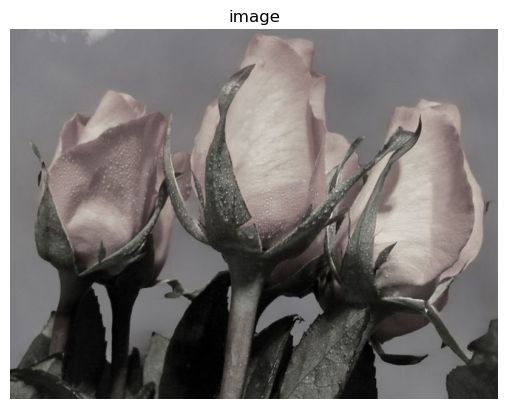

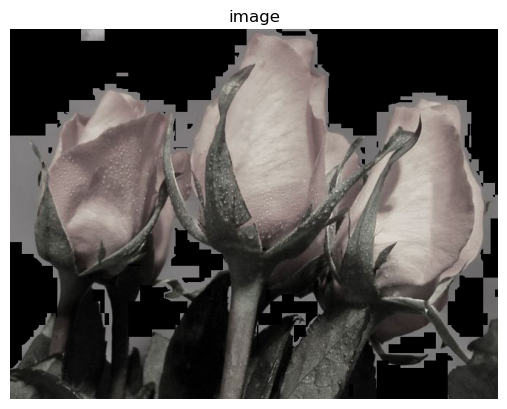

In [6]:
# 1- Get the required RGB color (Using a color picker)
R_value = 69
G_value = 91
B_value = 29



# 2- Read image

image=io.imread('./Q3.jpg')
show_images([image],['image'])
# image = image.astype(float)

# 3- extract R, G and B channels (as float)

R= image[:,:,0]
G= image[:,:,1]
B= image[:,:,2]


image[:,:,0] = R
image[:,:,1] = G
image[:,:,2] = B

image=image.astype(np.uint8)
mask = np.ones(G.shape)

mask[(B>R) & (B>G)] = 0
image[mask==0] = 0 
# 8- show the image or save it
show_images([image],['image'])



In [7]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('Q3.jpg')

# Convert the image to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Adjust Hue, Saturation, and Value
h, s, v = cv2.split(hsv_image)

# Modify Hue, Saturation, and Value channels
h = cv2.add(h, 3)  # Adjust hue by adding a value
s = cv2.add(s, 70)  # Increase saturation
v = cv2.add(v, 30)  # Brighten the image

# Merge channels back and convert to BGR
adjusted_hsv = cv2.merge([h, s, v])
adjusted_image = cv2.cvtColor(adjusted_hsv, cv2.COLOR_HSV2BGR)

# Save the new image
cv2.imwrite('new_image.jpg', adjusted_image)


True